#Divide and Conquer: van Emde Boas Trees



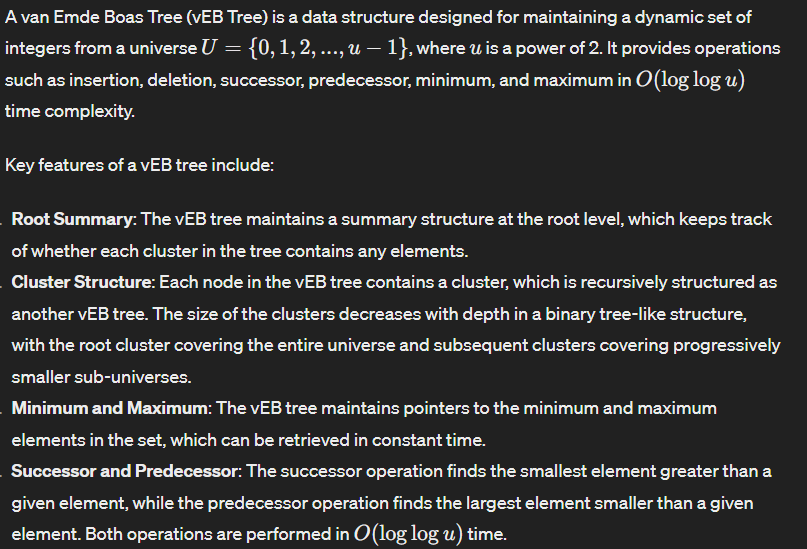

In [6]:
import math

class vEBTree:
    def __init__(self, universe):
        self.universe = universe
        self.min = None
        self.max = None
        if universe <= 2:
            self.summary = None
            self.cluster = None
        else:
            upper_sqrt = 2 ** int(math.ceil(math.log2(universe) / 2))
            lower_sqrt = 2 ** int(math.floor(math.log2(universe) / 2))
            self.summary = vEBTree(upper_sqrt)
            self.cluster = [vEBTree(lower_sqrt) for _ in range(upper_sqrt)]

    def high(self, x):
        return x // int(math.sqrt(self.universe))

    def low(self, x):
        return x % int(math.sqrt(self.universe))

    def index(self, x, y):
        return x * int(math.sqrt(self.universe)) + y

    def insert(self, x):
        if self.min is None:
            self.min = self.max = x
        else:
            if x < self.min:
                x, self.min = self.min, x
            if self.universe > 2:
                if self.cluster[self.high(x)].min is None:
                    self.summary.insert(self.high(x))
                    self.cluster[self.high(x)].min = self.low(x)
                    self.cluster[self.high(x)].max = self.low(x)
                else:
                    self.cluster[self.high(x)].insert(self.low(x))
            if x > self.max:
                self.max = x

    def delete(self, x):
        if self.min == self.max:
            self.min = self.max = None
        elif self.universe == 2:
            if x == 0:
                self.min = 1
            else:
                self.min = 0
            self.max = self.min
        else:
            if x == self.min:
                first_cluster = self.summary.min
                x = self.index(first_cluster, self.cluster[first_cluster].min)
                self.min = x
            self.cluster[self.high(x)].delete(self.low(x))
            if self.cluster[self.high(x)].min is None:
                self.summary.delete(self.high(x))
                if x == self.max:
                    summary_max = self.summary.max
                    if summary_max is None:
                        self.max = self.min
                    else:
                        self.max = self.index(summary_max, self.cluster[summary_max].max)

    def successor(self, x):
        if self.universe == 2:
            if x == 0 and self.max == 1:
                return 1
            else:
                return None
        elif self.min is not None and x < self.min:
            return self.min
        else:
            max_low = self.cluster[self.high(x)].max
            if max_low is not None and self.low(x) < max_low:
                offset = self.cluster[self.high(x)].successor(self.low(x))
                return self.index(self.high(x), offset)
            else:
                succ_cluster = self.summary.successor(self.high(x))
                if succ_cluster is None:
                    return None
                else:
                    offset = self.cluster[succ_cluster].min
                    return self.index(succ_cluster, offset)

    def predecessor(self, x):
        if self.universe == 2:
            if x == 1 and self.min == 0:
                return 0
            else:
                return None
        elif self.max is not None and x > self.max:
            return self.max
        else:
            min_low = self.cluster[self.high(x)].min
            if min_low is not None and self.low(x) > min_low:
                offset = self.cluster[self.high(x)].predecessor(self.low(x))
                return self.index(self.high(x), offset)
            else:
                pred_cluster = self.summary.predecessor(self.high(x))
                if pred_cluster is None:
                    if self.min is not None and x > self.min:
                        return self.min
                    else:
                        return None
                else:
                    offset = self.cluster[pred_cluster].max
                    return self.index(pred_cluster, offset)

    def minimum(self):
        return self.min

    def maximum(self):
        return self.max

def main():
    veb_tree = vEBTree(16)
    elements = [2, 3, 4, 7, 14, 15]
    for element in elements:
        veb_tree.insert(element)

    print("Minimum:", veb_tree.minimum())  # Output: 2
    print("Maximum:", veb_tree.maximum())  # Output: 15
    print("Successor of 3:", veb_tree.successor(3))  # Output: 4
    print("Predecessor of 7:", veb_tree.predecessor(7))  # Output: 4

    print("\nDeleting element 7:")
    veb_tree.delete(4)

    print("Successor of 3:", veb_tree.successor(3))
    print("Predecessor of 7:", veb_tree.predecessor(7))

if __name__ == "__main__":
    main()


Minimum: 2
Maximum: 15
Successor of 3: 4
Predecessor of 7: 4

Deleting element 7:
Successor of 3: 7
Predecessor of 7: 3
